In [ ]:
#https://drive.google.com/drive/folders/14CGqlh9ppVGAhvfM85q5otsOs-LkvyPo?usp=share_link

In [ ]:
#!unzip './25_BabyProducts.zip' -d './25_BabyProducts'
!unzip './final_dataset.csv.zip' -d './final_dataset.csv'

Archive:  ./final_dataset.csv.zip
  inflating: ./final_dataset.csv/final_dataset.csv  
  inflating: ./final_dataset.csv/__MACOSX/._final_dataset.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
folder_path = './25_BabyProducts'
rating_df = pd.read_csv(folder_path+'/ratings_Baby.csv', header=None)
rating_df.columns = ['user','item','rating','timestamp']
rating_df['timestamp'] = ((rating_df['timestamp']/(86400))/365)+1970 #number of years from 1970 plus the year timestamps start from

In [ ]:
rating_df.describe()

,rating,timestamp
count,915446.000000,915446.000000
mean,4.117695,2012.374793
std,1.289458,2.309777
min,1.000000,2000.610959
25%,4.000000,2011.597260
50%,5.000000,2013.180822
75%,5.000000,2013.958904
max,5.000000,2014.586301


In [ ]:
rating_df.head(3)

,user,item,rating,timestamp
0,A28O3NP6WR5517,0188399313,5.0,2013.430137
1,AX0M1Z6ZWO52J,0188399399,5.0,2013.298630
2,A1KD7N84L7NIUT,0188399518,4.0,2014.150685


In [ ]:
#rating_df[rating_df["ser"] == 'A28O3NP6WR5517']
len(set(rating_df["item"].values))

64426

In [ ]:
q_low = rating_df["timestamp"].quantile(0.01)
q_hi  = rating_df["timestamp"].quantile(0.99) 

sum(rating_df[(rating_df["timestamp"] > q_hi) & (rating_df["timestamp"] < q_low)].values)

0

In [ ]:
with open('./25_BabyProducts/meta_Baby.json') as file:
    lines = file.read().splitlines()
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']

In [ ]:
df_inter.values[0]

array(["{'asin': '0188399313', 'categories': [['Baby']], 'description': 'Wee-Go Glass baby bottles by LifeFactory (Babylife) are designed to grow with your child. The included clear cover can also serve as an easy to hold cup. Twist on the solid cap (sold separately) and use your bottles for storing juice or snacks. Perfect for a lunchbox or traveling. The bright colored silicone sleeve (patent pending) helps to protect the bottle from breakage and provides a great gripping surface and tactile experience during feeding. The bottle and sleeve can be boiled or put in the dishwasher together. They can also go in the freezer, making breast milk storage simple.', 'title': 'Lifefactory 4oz BPA Free Glass Baby Bottles - 4-pack-raspberry and Lilac', 'price': 69.99, 'imUrl': 'http://ecx.images-amazon.com/images/I/41SwthpdD9L._SX300_.jpg', 'brand': 'Lifefactory', 'related': {'also_bought': ['B002SG7K7A', 'B003CJSXW8', 'B004PW4186', 'B002O3JH9Q', 'B002O3NLIO', 'B004HGSU28'], 'also_viewed': ['B003

In [ ]:
columns_new = ['asin', 'categories', 'description', 'title', 'price', 'imUrl', 'brand', "also_bought", "also_viewed", 'bought_together', 'buy_after_viewing']

In [ ]:
df_inter.values[0]

array(["{'asin': '0188399313', 'categories': [['Baby']], 'description': 'Wee-Go Glass baby bottles by LifeFactory (Babylife) are designed to grow with your child. The included clear cover can also serve as an easy to hold cup. Twist on the solid cap (sold separately) and use your bottles for storing juice or snacks. Perfect for a lunchbox or traveling. The bright colored silicone sleeve (patent pending) helps to protect the bottle from breakage and provides a great gripping surface and tactile experience during feeding. The bottle and sleeve can be boiled or put in the dishwasher together. They can also go in the freezer, making breast milk storage simple.', 'title': 'Lifefactory 4oz BPA Free Glass Baby Bottles - 4-pack-raspberry and Lilac', 'price': 69.99, 'imUrl': 'http://ecx.images-amazon.com/images/I/41SwthpdD9L._SX300_.jpg', 'brand': 'Lifefactory', 'related': {'also_bought': ['B002SG7K7A', 'B003CJSXW8', 'B004PW4186', 'B002O3JH9Q', 'B002O3NLIO', 'B004HGSU28'], 'also_viewed': ['B003

In [ ]:
meta_df = pd.DataFrame(columns=columns_new)

for json_obj in df_inter.values:

  data = {}

  original_string = json_obj[0]
  evaluated_value = eval(original_string)
  json_obj = json.dumps(evaluated_value)
  json_obj = json.loads(json_obj)

  k = json_obj.keys()

  data['asin'] = json_obj['asin'] if 'asin' in k else None
  data['categories'] = json_obj['categories'][0] if 'categories' in k else None 
  data['description'] = json_obj['description'] if 'description' in k else None
  data['title'] = json_obj['title'] if 'title' in k else None
  data['price'] = json_obj['price'] if 'price' in k else None 
  data['imUrl'] = json_obj['imUrl'] if 'imUrl' in k else None 
  data['brand'] = json_obj['brand'] if 'brand' in k else None 
  
  if 'related' in k:
    related_dict = json_obj['related']
    k = related_dict.keys()

    data['also_bought'] = [related_dict['also_bought']] if 'also_bought' in k else [None]
    data['also_viewed'] = [related_dict['also_viewed']] if 'also_viewed' in k else [None]
    data['bought_together'] = [related_dict['bought_together']] if 'bought_together' in k else [None]
    data['buy_after_viewing'] = [related_dict['buy_after_viewing']] if 'buy_after_viewing' in k else [None]

  else:
    data['also_bought'] = [None]
    data['also_viewed'] = [None]
    data['bought_together'] = [None]
    data['buy_after_viewing'] = [None]

  meta_df = pd.concat([meta_df, pd.DataFrame(data)])


In [ ]:
meta_df.to_csv('meta_baby_dataset.csv')

In [ ]:
meta_df.head(10)

,asin,categories,description,title,price,imUrl,brand,also_bought,also_viewed,bought_together,buy_after_viewing
0,0188399313,Baby,Wee-Go Glass baby bottles by LifeFactory (Baby...,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,69.99,http://ecx.images-amazon.com/images/I/41Swthpd...,Lifefactory,"[B002SG7K7A, B003CJSXW8, B004PW4186, B002O3JH9...","[B003CJSXW8, B0052QOL1Q, B004PW4186, B00EN0OLZ...","[B002SG7K7A, B003CJSXW8]","[B003CJSXW8, B0052QOL1Q, B004PW4186, B002SG7K7A]"
0,0188399518,Baby,The Planet Wise Flannel Wipes are 10 super sof...,Planetwise Flannel Wipes,15.95,http://ecx.images-amazon.com/images/I/41otjnA4...,Planet Wise,"[B00G96N3YY, B003XSEV2O, B000138GNY, B005WWIE3...","[B000138GNY, B00G96N3YY, B006J2U4T0, B00GLBR3C...","[B00G96N3YY, B003XSEV2O]","[B000138GNY, B006J2U4T0, B00G96N3YY, B005WWIMGA]"
0,0188399399,Baby,The Planet Wise Wipe PouchTM features our pate...,Planetwise Wipe Pouch,10.95,http://ecx.images-amazon.com/images/I/61x8h9u6...,None,"[B005WWI0DA, B005WWIMGA, B006J2U4T0, B000138GN...","[B005WWIMGA, B00G96N3YY, B00DAI76TC, B0067GKHV...",None,"[B005WWIMGA, B00G96N3YY, B00DAI76TC, B0067GKHVS]"
0,0316967297,Baby,Hand crafted set includes 1 full quilt (76x86 ...,Annas Dream Full Quilt with 2 Shams,109.95,http://ecx.images-amazon.com/images/I/51%2BZ1%...,None,None,"[B009LTER3W, B00575TI5Q, B004NSYYJI]",None,"[B009LTER3W, B001MX5EE6, B00575TI5Q, B0029009TG]"
0,0615447279,Baby,Thumbuddy To Love- The Binky Fairy helps child...,Stop Pacifier Sucking without tears with Thumb...,16.95,http://ecx.images-amazon.com/images/I/51RKKENl...,,"[0979670004, 1601310234, B005G172KE, 157542257...","[0979670004, 1575422573, 1493535943, 061527364...",[B005G172KE],"[0979670004, 1575422573, B005G172KE, 1493535943]"
0,0670062049,Baby,A baby can be put at risk with an unsafe pacif...,5 Pink Gumdrops + One Pacifier Clip,9.99,http://ecx.images-amazon.com/images/I/41u7qILN...,None,None,"[B005QPE0W8, B00AZWDLHM, B004IOHN8Q, B002GOHLV...",None,"[B005QPE0W8, B00AZWDLHM, B004323NHS, B00GL6CT7E]"
0,0705391752,Baby,Overview\n\nInclude the beloved Peter Rabbit i...,A Tale of Baby's Days with Peter Rabbit,65.07,http://ecx.images-amazon.com/images/I/51%2BNFd...,None,None,"[B001AL7GOQ, 0723256837, 0723262845, B001ET7NE...",[0723256837],"[B001AL7GOQ, 0723256837, 0723262845, B00AYZFGZA]"
0,097293751X,Baby,Easily keep track of your baby's or child's da...,"Baby Tracker&reg; - Daily Childcare Journal, S...",17.00,http://ecx.images-amazon.com/images/I/41Bb6wf%...,Time Too,"[9729375011, B004FN1AE8, B000V5KPZ4, B001F8TLL...","[9729375011, B004FN1ACK, 0976779803, B00K1FNSF...","[9729375011, B001F8TLLU]","[9729375011, B001F8TLLU, B004FN1ACK, 0976779803]"
0,0974671517,Baby,What should we call the Twins? uses an amusing...,Wee Gallery Twins Board Book,3.58,http://ecx.images-amazon.com/images/I/51lCiAJW...,Wee Gallery,"[0670013102, 0763637025, 1442430265, 068984494...","[0670013102, B000KN2YOM, B004U8XBFO, 052542028...","[0670013102, 0763637025]","[0670013102, B004U8XBFO, B000KN2YOM, 0525420282]"
0,0980027519,Baby,"These adorable, high quality calendars are gen...",Nature's Lullabies First and Second Year Calen...,NaN,http://ecx.images-amazon.com/images/I/41NAMKmS...,None,None,None,None,None


In [ ]:
len(rating_df['item'])

915446

In [ ]:
len(set(rating_df['item']))

64426

In [ ]:
len(meta_df['asin'])

71317

In [ ]:
len(set(meta_df['asin']))

71317

In [ ]:
len(meta_df[meta_df['categories'] == 'Baby']) #we can drop it

71317

In [ ]:
meta_df.rename(columns={"asin": "item"}, inplace=True)
inner_merged = pd.merge(rating_df, meta_df)
inner_merged

,user,item,rating,timestamp,categories,description,title,price,imUrl,brand,also_bought,also_viewed,bought_together,buy_after_viewing
0,A28O3NP6WR5517,0188399313,5.0,2013.430137,Baby,Wee-Go Glass baby bottles by LifeFactory (Baby...,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,69.99,http://ecx.images-amazon.com/images/I/41Swthpd...,Lifefactory,"[B002SG7K7A, B003CJSXW8, B004PW4186, B002O3JH9...","[B003CJSXW8, B0052QOL1Q, B004PW4186, B00EN0OLZ...","[B002SG7K7A, B003CJSXW8]","[B003CJSXW8, B0052QOL1Q, B004PW4186, B002SG7K7A]"
1,AX0M1Z6ZWO52J,0188399399,5.0,2013.298630,Baby,The Planet Wise Wipe PouchTM features our pate...,Planetwise Wipe Pouch,10.95,http://ecx.images-amazon.com/images/I/61x8h9u6...,None,"[B005WWI0DA, B005WWIMGA, B006J2U4T0, B000138GN...","[B005WWIMGA, B00G96N3YY, B00DAI76TC, B0067GKHV...",None,"[B005WWIMGA, B00G96N3YY, B00DAI76TC, B0067GKHVS]"
2,A1KD7N84L7NIUT,0188399518,4.0,2014.150685,Baby,The Planet Wise Flannel Wipes are 10 super sof...,Planetwise Flannel Wipes,15.95,http://ecx.images-amazon.com/images/I/41otjnA4...,Planet Wise,"[B00G96N3YY, B003XSEV2O, B000138GNY, B005WWIE3...","[B000138GNY, B00G96N3YY, B006J2U4T0, B00GLBR3C...","[B00G96N3YY, B003XSEV2O]","[B000138GNY, B006J2U4T0, B00G96N3YY, B005WWIMGA]"
3,A29CUDEIF4X1UO,0188399518,3.0,2013.545205,Baby,The Planet Wise Flannel Wipes are 10 super sof...,Planetwise Flannel Wipes,15.95,http://ecx.images-amazon.com/images/I/41otjnA4...,Planet Wise,"[B00G96N3YY, B003XSEV2O, B000138GNY, B005WWIE3...","[B000138GNY, B00G96N3YY, B006J2U4T0, B00GLBR3C...","[B00G96N3YY, B003XSEV2O]","[B000138GNY, B006J2U4T0, B00G96N3YY, B005WWIMGA]"
4,A32592TYN6C9EM,0316967297,4.0,2013.709589,Baby,Hand crafted set includes 1 full quilt (76x86 ...,Annas Dream Full Quilt with 2 Shams,109.95,http://ecx.images-amazon.com/images/I/51%2BZ1%...,None,None,"[B009LTER3W, B00575TI5Q, B004NSYYJI]",None,"[B009LTER3W, B001MX5EE6, B00575TI5Q, B0029009TG]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915441,A3U7438NXFL16A,B00M08188I,5.0,2014.583562,Baby,EasyGoPro Ergonomic Toilet Footrest70 Day Mone...,easyGopro Ergonomic Toilet Footrest for Easier...,21.99,http://ecx.images-amazon.com/images/I/31LgOaDu...,None,None,"[B008G9B11E, B00G5PTWT4, B00HZQO8LE, B007BISCT...",None,None
915442,A1K0FYAEF3H0UP,B00M08188I,5.0,2014.583562,Baby,EasyGoPro Ergonomic Toilet Footrest70 Day Mone...,easyGopro Ergonomic Toilet Footrest for Easier...,21.99,http://ecx.images-amazon.com/images/I/31LgOaDu...,None,None,"[B008G9B11E, B00G5PTWT4, B00HZQO8LE, B007BISCT...",None,None
915443,A25DMFZ9UR90S6,B00M08188I,5.0,2014.583562,Baby,EasyGoPro Ergonomic Toilet Footrest70 Day Mone...,easyGopro Ergonomic Toilet Footrest for Easier...,21.99,http://ecx.images-amazon.com/images/I/31LgOaDu...,None,None,"[B008G9B11E, B00G5PTWT4, B00HZQO8LE, B007BISCT...",None,None
915444,AVH3CQ9L55WW0,B00M08188I,5.0,2014.583562,Baby,EasyGoPro Ergonomic Toilet Footrest70 Day Mone...,easyGopro Ergonomic Toilet Footrest for Easier...,21.99,http://ecx.images-amazon.com/images/I/31LgOaDu...,None,None,"[B008G9B11E, B00G5PTWT4, B00HZQO8LE, B007BISCT...",None,None


In [ ]:
#inner_merged.to_csv('final_dataset.csv')

In [ ]:
final_dataset = pd.read_csv('./data/final_dataset.csv', index_col=[0])

In [ ]:
final_dataset.columns

Index(['user', 'item', 'rating', 'timestamp', 'categories', 'description',
       'title', 'price', 'imUrl', 'brand', 'also_bought', 'also_viewed',
       'bought_together', 'buy_after_viewing'],
      dtype='object')

In [ ]:
final_dataset.head(2)

,user,item,rating,timestamp,categories,description,title,price,imUrl,brand,also_bought,also_viewed,bought_together,buy_after_viewing
0,A28O3NP6WR5517,0188399313,5.0,2013.430137,Baby,Wee-Go Glass baby bottles by LifeFactory (Baby...,Lifefactory 4oz BPA Free Glass Baby Bottles - ...,69.99,http://ecx.images-amazon.com/images/I/41Swthpd...,Lifefactory,"['B002SG7K7A', 'B003CJSXW8', 'B004PW4186', 'B0...","['B003CJSXW8', 'B0052QOL1Q', 'B004PW4186', 'B0...","['B002SG7K7A', 'B003CJSXW8']","['B003CJSXW8', 'B0052QOL1Q', 'B004PW4186', 'B0..."
1,AX0M1Z6ZWO52J,0188399399,5.0,2013.298630,Baby,The Planet Wise Wipe PouchTM features our pate...,Planetwise Wipe Pouch,10.95,http://ecx.images-amazon.com/images/I/61x8h9u6...,NaN,"['B005WWI0DA', 'B005WWIMGA', 'B006J2U4T0', 'B0...","['B005WWIMGA', 'B00G96N3YY', 'B00DAI76TC', 'B0...",NaN,"['B005WWIMGA', 'B00G96N3YY', 'B00DAI76TC', 'B0..."


In [ ]:
#final_dataset.drop('index', axis=1, inplace=True)
final_dataset.drop('categories', axis=1, inplace=True)

In [ ]:
final_dataset.describe()

,rating,timestamp,price
count,915446.000000,915446.000000,863533.000000
mean,4.117695,2012.374793,50.532528
std,1.289458,2.309777,74.143512
min,1.000000,2000.610959,0.010000
25%,4.000000,2011.597260,11.830000
50%,5.000000,2013.180822,22.990000
75%,5.000000,2013.958904,51.000000
max,5.000000,2014.586301,999.990000


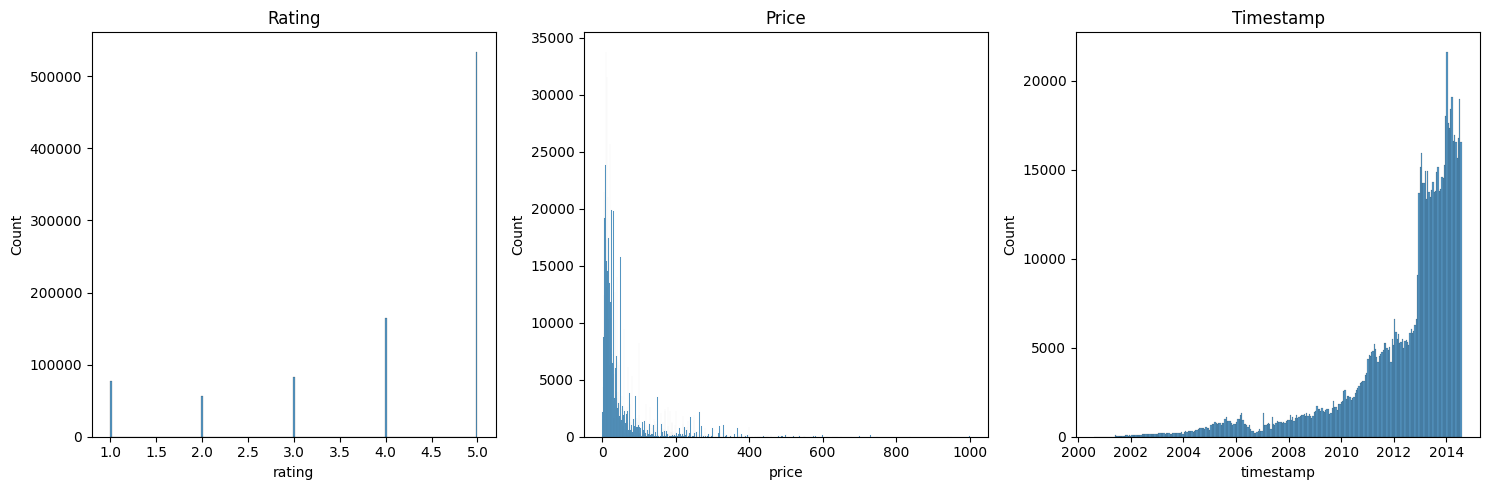

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(final_dataset['rating'], ax=ax[0])
ax[0].set_title('Rating')

sns.histplot(final_dataset['price'], ax=ax[1])
ax[1].set_title('Price')

sns.histplot(final_dataset['timestamp'], ax=ax[2])
ax[2].set_title('Timestamp')

plt.tight_layout()
plt.show()

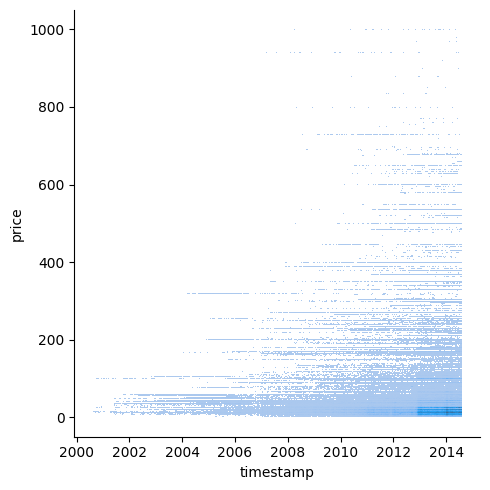

In [ ]:
sns.displot(final_dataset, x="timestamp", y="price")
plt.show()

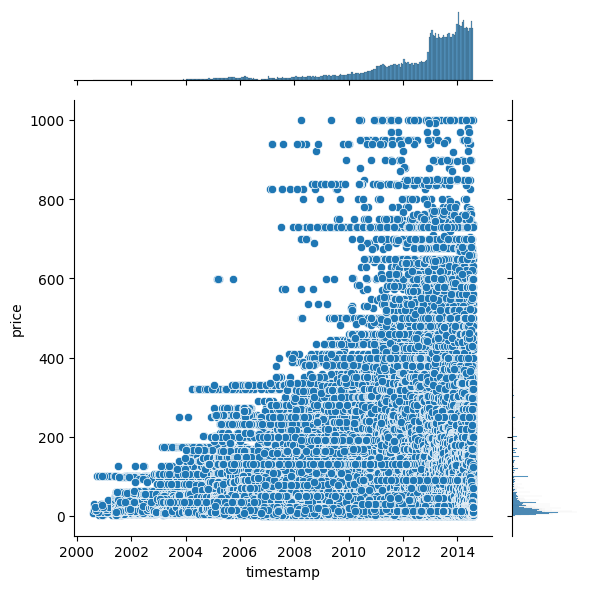

In [ ]:
sns.jointplot(data=final_dataset, x="timestamp", y="price")
plt.show()

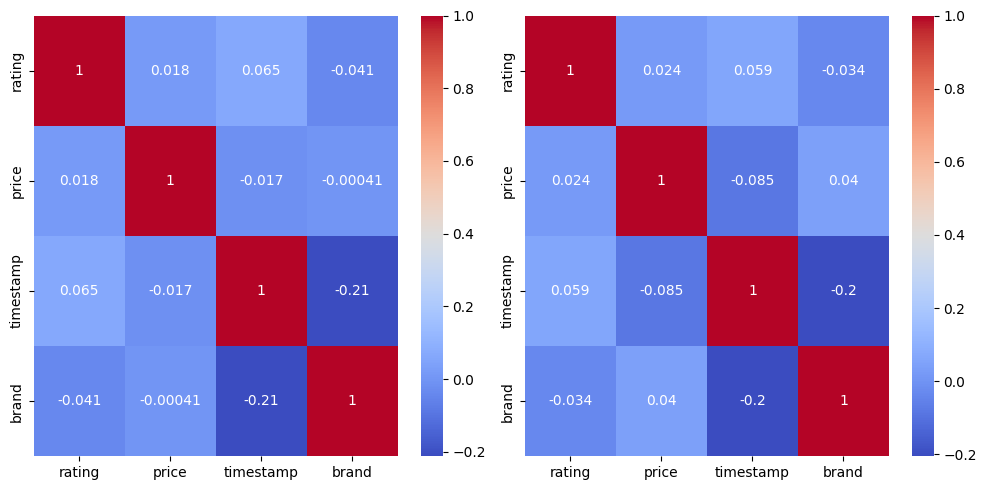

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Create a label (category) encoder object
le = LabelEncoder()

# Fit the encoder to the pandas column
le.fit(final_dataset['brand'])

# Transform Categories Into Integers
final_dataset['brand'] = le.transform(final_dataset['brand'])
# Convert 'timestamp' to an integer type
final_dataset['timestamp'] = final_dataset['timestamp'].astype(int)
# Include 'timestamp' in the correlation matrix
correlation_matrix = final_dataset[['rating', 'price', 'timestamp', 'brand']].corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[0])
# Show the plot
# Include 'timestamp' in the correlation matrix
correlation_matrix = final_dataset[['rating', 'price', 'timestamp', 'brand']].corr(method='spearman')
# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[1])
# Show the plot
plt.show()

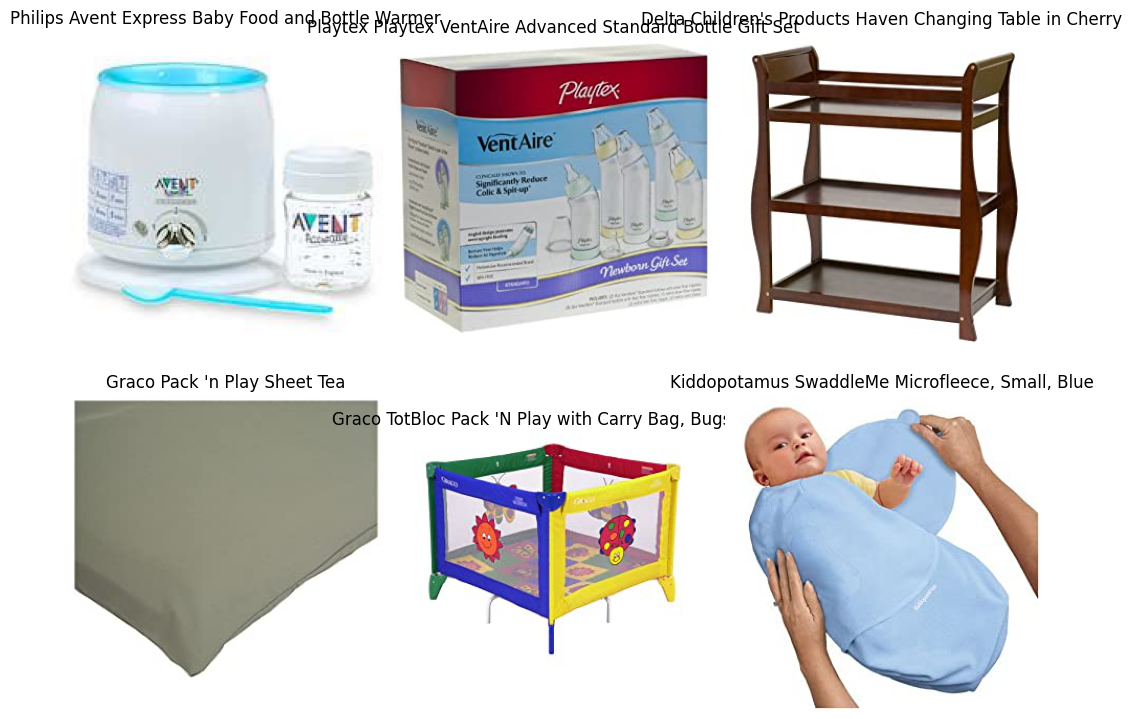

In [ ]:
from skimage import io
import random

# Generate 6 unique random indices between 0 and 1,000,000
indices = random.sample(range(0, 100000), 6)

# Adjust the size of the figure
plt.figure(figsize=(10, 8))


# Loop through your list and add each image to the subplot
for i, index in enumerate(indices):
    # Load the image
    f = final_dataset['imUrl'][index]
    t = final_dataset['title'][index]
    a = io.imread(f)
    
    # Add a subplot with image
    plt.subplot(2, 3, i+1)
    plt.imshow(a)
    plt.title(t)
    plt.axis('off')

# Automatically adjust subplot parameters for better layout
plt.tight_layout()
plt.show()

In [ ]:
final_dataset.drop('imUrl', axis=1, inplace=True)
print('Nans percentage: ', len(final_dataset[final_dataset.isna().any(axis=1)])/len(final_dataset) * 100, '%')

Nans percentage:  35.07634530054203 %


In [ ]:
final_dataset.isna().sum()

index                     0
user                      0
item                      0
rating                    0
timestamp                 0
description          111987
title                  1493
price                 51913
brand                     0
also_bought          162623
also_viewed           62054
bought_together      214195
buy_after_viewing     55600
dtype: int64

In [ ]:
final_dataset.reset_index(inplace=True)
#temp_df

In [ ]:
#way bettre to drop or take the expected value of the distribution
for i in final_dataset[final_dataset['price'].isnull()].index.tolist():
  missing_price_item = final_dataset[['item']].iloc[i]['item']
  for sold_price in final_dataset[(final_dataset['item'] == missing_price_item)]['price'].values:
    if sold_price is not None:
      final_dataset.at[i, 'price'] = sold_price
      break

for i in final_dataset[final_dataset['title'].isnull()].index.tolist():
  missing_title_item = final_dataset[['item']].iloc[i]['item']
  for title_to_fill in final_dataset[(final_dataset['item'] == missing_title_item)]['title'].values:
    if title_to_fill is not None:
      final_dataset.at[i, 'title'] = title_to_fill
      break

for i in final_dataset[final_dataset['description'].isnull()].index.tolist():
  missing_desc_item = final_dataset[['item']].iloc[i]['item']
  for desc_to_fill in final_dataset[(final_dataset['item'] == missing_desc_item)]['description'].values:
    if desc_to_fill is not None:
      final_dataset.at[i, 'description'] = desc_to_fill

KeyboardInterrupt: ignored

In [ ]:
print('Original df shape: {}'.format(final_dataset.shape))
#drop nans
print('Without NaNs df shape: {}'.format(final_dataset.shape))

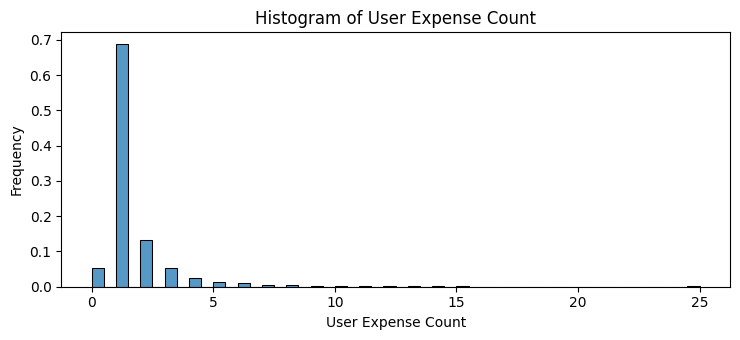

In [ ]:
data = final_dataset.groupby('user')['price'].count().clip(upper=25)

# Generate the histogram
sns.histplot(data, stat='probability', bins=50, kde=False)

# Set the title and labels
plt.title('Histogram of User Expense Count')
plt.xlabel('User Expense Count')
plt.ylabel('Density')

# Show the plot
plt.show()

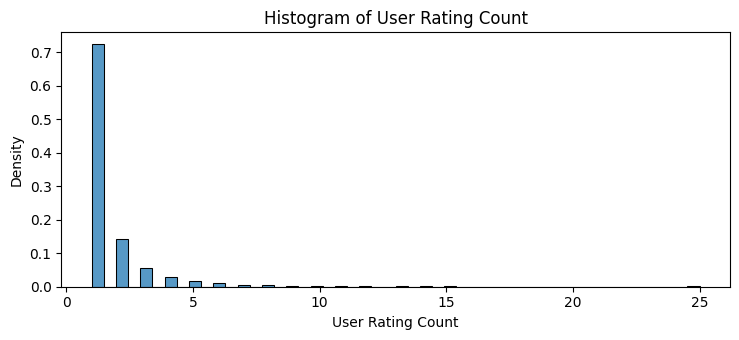

In [ ]:
data = final_dataset.groupby('user')['rating'].count().clip(upper=25)

# Generate the histogram
sns.histplot(data, stat='probability', bins=50, kde=False)

# Set the title and labels
plt.title('Histogram of User Rating Count')
plt.xlabel('User Rating Count')
plt.ylabel('Density')

# Show the plot
plt.show()

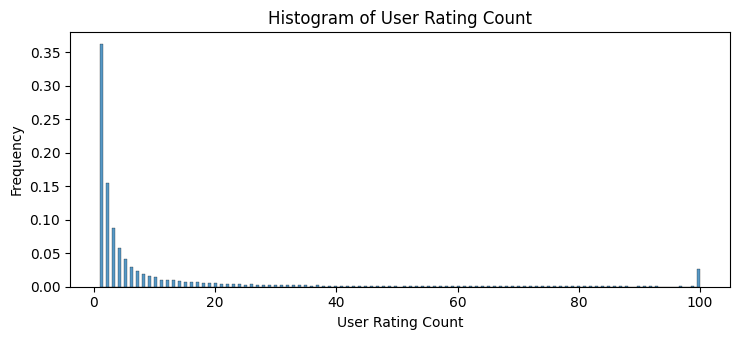

In [ ]:
data = final_dataset.groupby('item')['rating'].count().clip(upper=100)

# Generate the histogram
sns.histplot(data, stat='probability', bins=200, kde=False)

# Set the title and labels
plt.title('Histogram of User Rating Count')
plt.xlabel('User Rating Count')
plt.ylabel('Density')

# Show the plot
plt.show()

In [ ]:
min_user_ratings=1
temp_df_usr = final_dataset['user'].value_counts() > min_user_ratings
temp_df_usr = temp_df_usr[temp_df_usr].index.tolist()

min_item_ratings=1
temp_df_item = final_dataset['item'].value_counts() > min_item_ratings
temp_df_item = temp_df_item[temp_df_item].index.tolist()

temp_df = final_dataset[(final_dataset['user'].isin(temp_df_usr)) & (final_dataset['item'].isin(temp_df_item))]
print('Original df shape: {}'.format(final_dataset.shape))
print('Modified df shape: {}'.format(temp_df.shape))

Original df shape: (915446, 12)
Modified df shape: (516975, 12)
